In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv("Plots/performance_records.csv")
data = data[data['data_size'] == 100000]
data.head(10)

,h,k,p,sigma,data_size,distortion,time_find_min_moles,time_total
0,0.4,30,2,0.15,100000,0.089038,98,174
1,0.4,30,3,0.15,100000,0.085790,478,552
2,0.4,30,4,0.15,100000,0.095449,978,1061
3,0.4,30,5,0.15,100000,0.098805,1258,1361
4,0.4,30,6,0.15,100000,0.103487,2005,2099
5,0.4,30,7,0.15,100000,0.125590,4154,4258
6,0.4,5,4,0.15,100000,0.109383,2178,2278
7,0.4,10,4,0.15,100000,0.111346,1860,1977
8,0.4,20,4,0.15,100000,0.105117,1744,1852
9,0.4,30,4,0.15,100000,0.089137,748,843


In [28]:
"""
performance records for public items selected when np.random.seed() was set, make similar runs for the sake of presentation, maybe there will be better results. But so far the plots behave very similar to what is provided in the paper.
"""
data_seed_k = pd.read_csv("Plots/performance_records_k_random_seed_set.csv")
data_seed_k = data_seed_k[data_seed_k['data_size'] == 100000]
data_seed_k.head(10)



data_seed_p = pd.read_csv("Plots/performance_records_p_random_seed_set.csv")
data_seed_p = data_seed_p[data_seed_p['data_size'] == 100000]
print(data_seed_p.head(10))
df = data_seed_p.loc[(data.h == 0.4) & (data.k == 30) & (data.sigma == 0.15) & (data.data_size == 100000)]
print(df.head(10))

     h   k  p  sigma  data_size  distortion  time_find_min_moles  time_total
0  0.4  30  2   0.15     100000    0.100880                  119         126
1  0.4  30  3   0.15     100000    0.110301                  850         859
2  0.4  30  4   0.15     100000    0.114805                 2534        2545
3  0.4  30  5   0.15     100000    0.117499                 2502        2513
4  0.4  30  6   0.15     100000    0.117499                 2508        2519
5  0.4  30  7   0.15     100000    0.117499                 2484        2495
     h   k  p  sigma  data_size  distortion  time_find_min_moles  time_total
0  0.4  30  2   0.15     100000    0.100880                  119         126
1  0.4  30  3   0.15     100000    0.110301                  850         859
2  0.4  30  4   0.15     100000    0.114805                 2534        2545
3  0.4  30  5   0.15     100000    0.117499                 2502        2513
4  0.4  30  6   0.15     100000    0.117499                 2508        2519

In [39]:
def prepare_values(data, col_name):
    print(f'\n#--- Preparing values for {col_name} ---#\n')
    df=None
    if col_name == 'p':
        df = data.loc[(data.h == 0.4) & (data.k == 30) & (data.sigma == 0.15) & (data.data_size == 100000)]
        print(df.head(10))
    if col_name == 'k':
        df = data.loc[(data.h == 0.4) & (data.p == 4) & (data.sigma == 0.15) & (data.data_size == 100000)]
        print(df.head(10))
    if col_name == 'sigma':
        df = data.loc[(data.h == 0.4) & (data.p == 4) & (data.k == 30) & (data.data_size == 100000)]
        print(df.head(10))

    range_keys = sorted(df[col_name].unique())
    distortion_dict = {}
    runtime_dict = {}
    for key in range_keys:
        # multiply by 100 to make it a percentage value
        # print(f'\n\n###############\nkey:{key}, mean:{df[df[col_name]==key]["time_total"].mean()}\n{df[df[col_name] == key]["time_total"]}\n########################')
        distortion_dict[key] = round(df[df[col_name]==key]['distortion'].mean() * 100, 2)
        runtime_dict[key] = {'total': round(df[df[col_name] == key]['time_total'].mean()),
                        'min_moles':round(df[df[col_name] == key]['time_find_min_moles'].mean())}

    print(f'distortion: {distortion_dict}\n'
          f'runtime: {runtime_dict}')
    return distortion_dict, runtime_dict

def plot_distortion(x,y, x_label: str):

    # x = np.asarray(x)
    # y = np.asarray(y)

    y_ticks = [i for i in range(0,30,5)]
    print(y_ticks)

    fig, ax = plt.subplots(figsize=(16,8))
    ax.plot(x,y, marker='v',linewidth=2, color='blue')
    ax.set_title(f'Distortion vs {x_label}')
    ax.set_xlabel(x_label)
    ax.set_ylabel('Distortion')
    ax.set_ylim([0,25])
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f'{i}%' for i in y_ticks])
    ax.legend()

def plot_runtime():
    pass

In [30]:
p_distortion, p_runtime = prepare_values(data_seed_p, 'p')
k_distortion, k_runtime = prepare_values(data_seed_k,'k')
sigma_distortion, sigma_runtime = prepare_values(data, 'sigma')



#--- Preparing values for p ---#

     h   k  p  sigma  data_size  distortion  time_find_min_moles  time_total
0  0.4  30  2   0.15     100000    0.100880                  119         126
1  0.4  30  3   0.15     100000    0.110301                  850         859
2  0.4  30  4   0.15     100000    0.114805                 2534        2545
3  0.4  30  5   0.15     100000    0.117499                 2502        2513
4  0.4  30  6   0.15     100000    0.117499                 2508        2519
5  0.4  30  7   0.15     100000    0.117499                 2484        2495


###############
key:2, mean:126.0
0    126
Name: time_total, dtype: int64
########################


###############
key:3, mean:859.0
1    859
Name: time_total, dtype: int64
########################


###############
key:4, mean:2545.0
2    2545
Name: time_total, dtype: int64
########################


###############
key:5, mean:2513.0
3    2513
Name: time_total, dtype: int64
########################


###############


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0, 5, 10, 15, 20, 25]
[0, 5, 10, 15, 20, 25]
[0, 5, 10, 15, 20, 25]


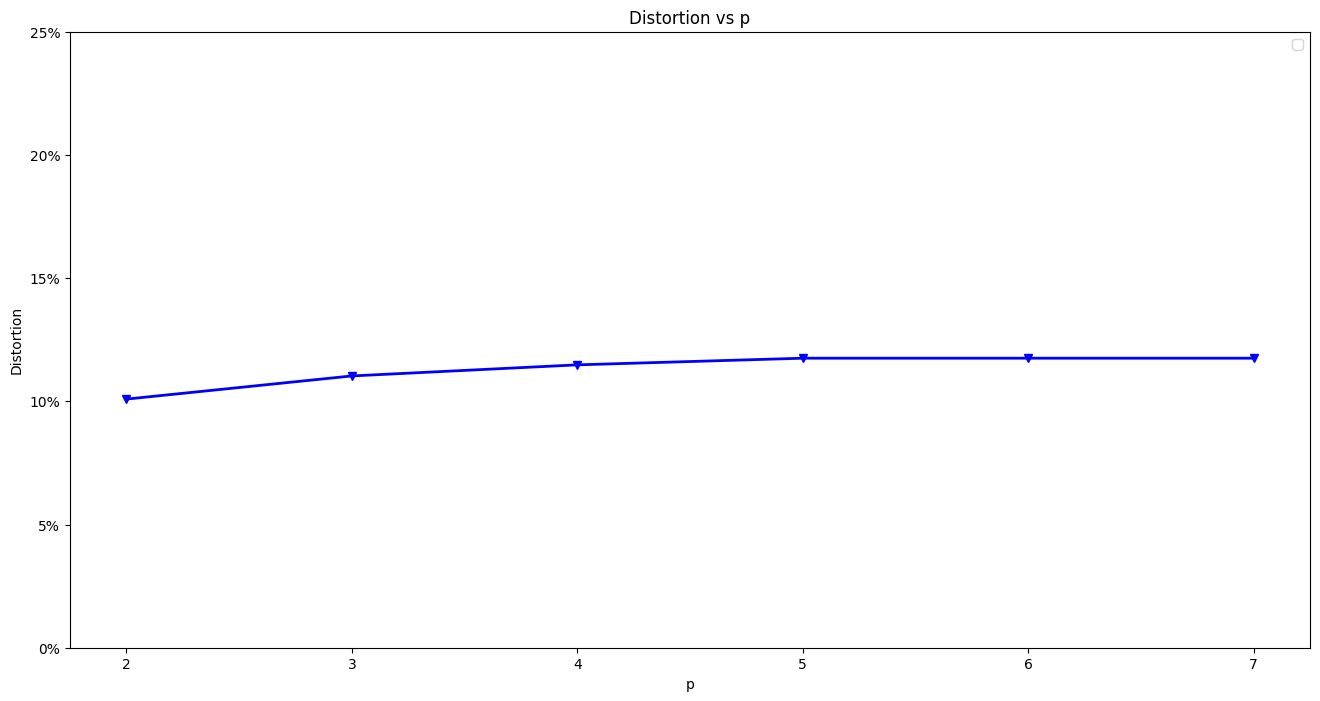

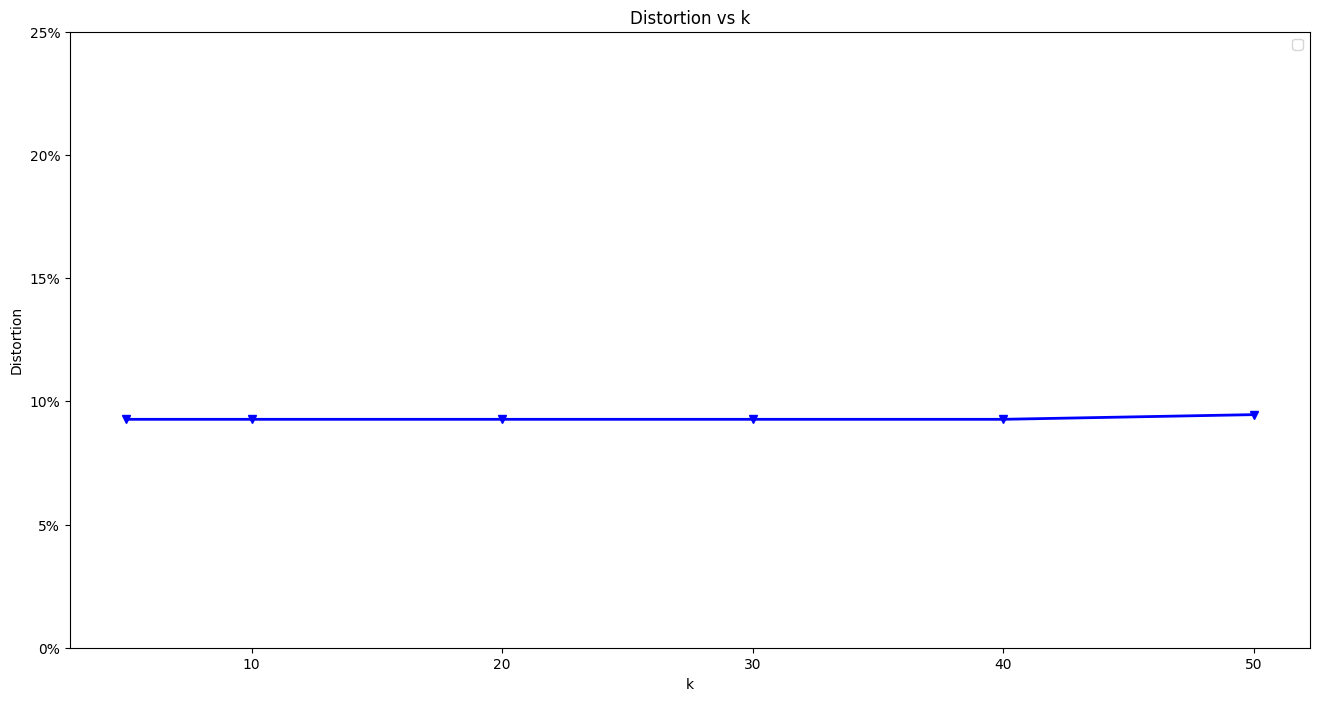

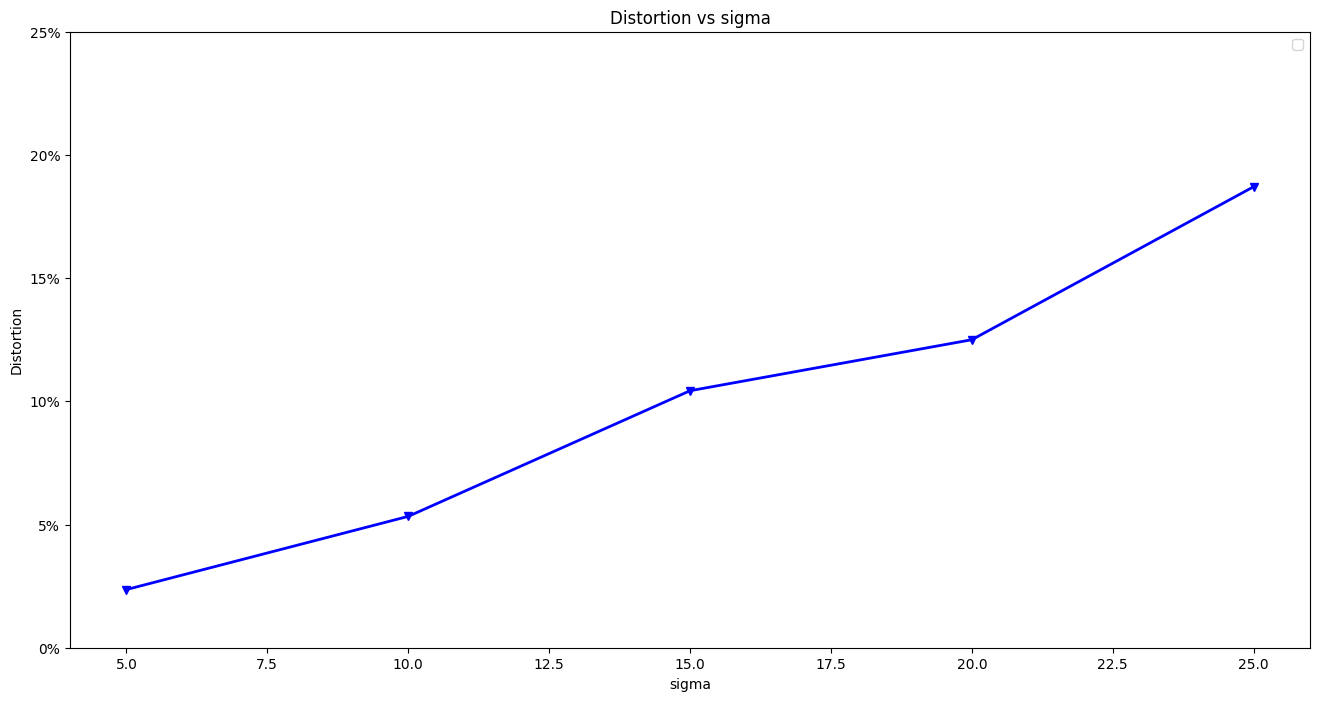

In [40]:
plot_distortion(p_distortion.keys(), p_distortion.values(), 'p')
plot_distortion(k_distortion.keys(), k_distortion.values(), 'k')
plot_distortion([i*100 for i in sigma_distortion.keys()], sigma_distortion.values(), 'sigma')



[126, 859, 2545, 2513, 2519, 2495]
[119, 850, 2534, 2502, 2508, 2484]
[2, 3, 4, 5, 6, 7]
[0, 5, 10, 15, 20, 25]


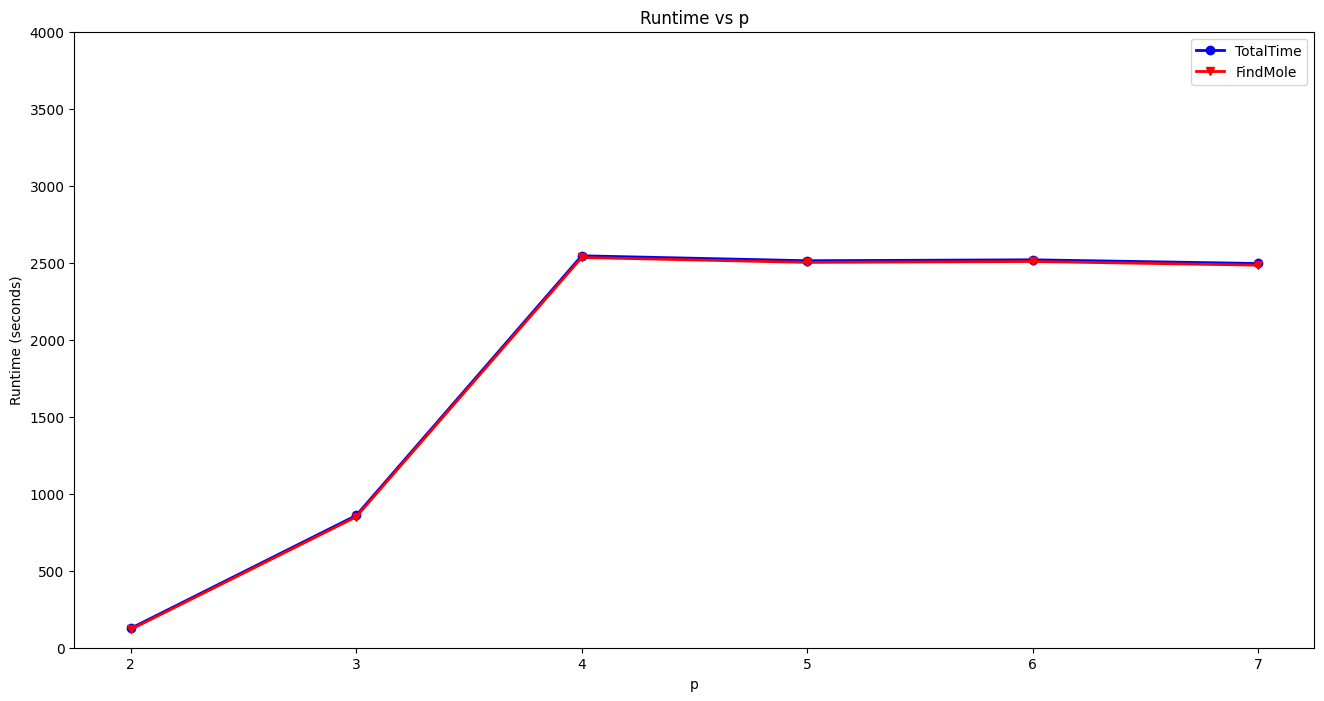

In [38]:
## Plots for p vs runtime
x = [i for i in p_runtime.keys()]
y_total = list(map(lambda a: p_runtime.get(a)['total'], p_runtime))
y_min_moles = list(map(lambda a: p_runtime.get(a)['min_moles'], p_runtime))
print(list(y_total))
print(list(y_min_moles))
print(x)

x_label = 'p'
y_ticks = [i for i in range(0,30,5)]
print(y_ticks)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x,y_total, label='TotalTime', marker='o', linewidth=2, color='blue')
ax.plot(x,y_min_moles, label='FindMole', marker='v', linewidth=2, color='red')
ax.set_title(f'Runtime vs {x_label}')
ax.set_xlabel(x_label)
ax.set_ylabel('Runtime (seconds)')
ax.set_ylim([0,4000])
# plt.gca().patch.set_facecolor('white')
ax.legend()

[1279, 1186, 1159, 1026, 894, 764]
[1271, 1171, 1150, 1017, 886, 752]
[5, 10, 20, 30, 40, 50]
[0, 5, 10, 15, 20, 25]


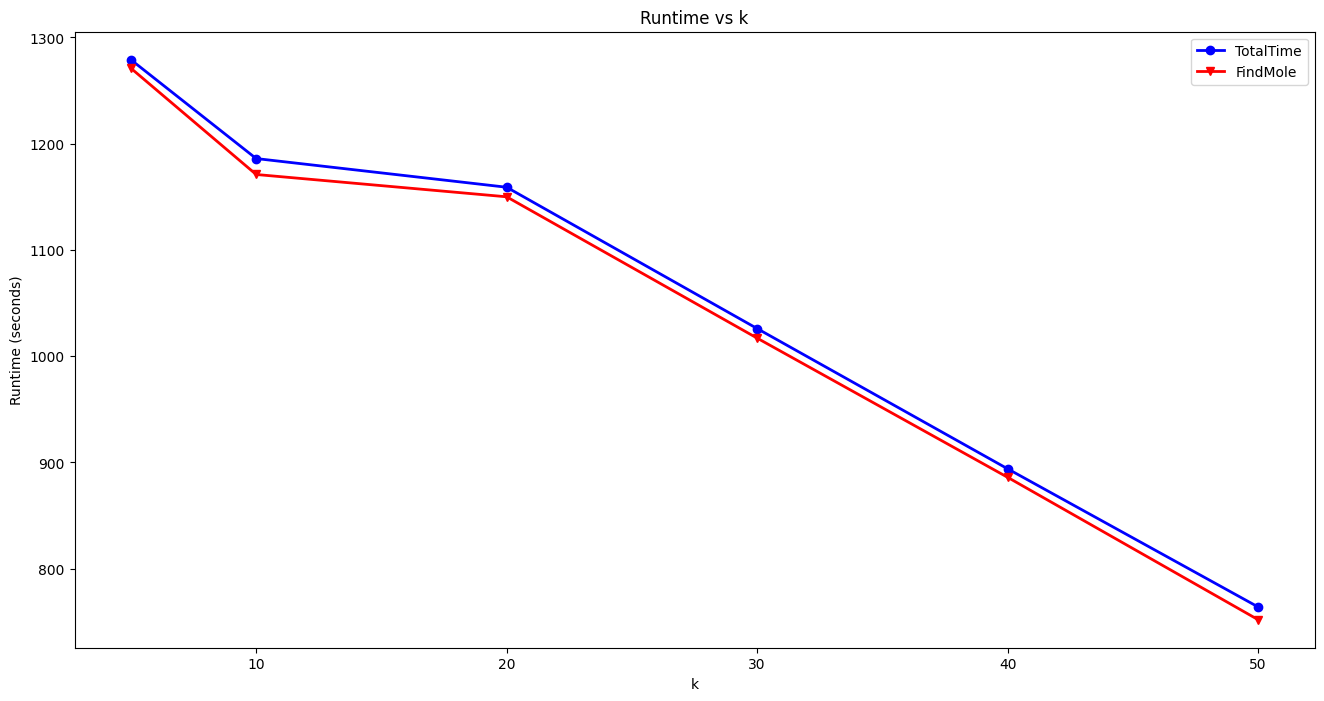

In [35]:
# plot for k vs runtime

x = [i for i in k_runtime.keys()]
y_total = list(map(lambda a: k_runtime.get(a)['total'], k_runtime))
y_min_moles = list(map(lambda a: k_runtime.get(a)['min_moles'], k_runtime))
print(list(y_total))
print(list(y_min_moles))
print(x)

x_label = 'k'
y_ticks = [i for i in range(0,30,5)]
print(y_ticks)

fig, (ax1) = plt.subplots(figsize=(16, 8))
ax1.plot(x,y_total, label='TotalTime', marker='o', linewidth=2, color='blue')
ax1.plot(x,y_min_moles, label='FindMole', marker='v', linewidth=2, color='red')
ax1.set_title(f'Runtime vs {x_label}')
ax1.set_xlabel(x_label)
ax1.set_ylabel('Runtime (seconds)')
ax1.legend()


[41, 155, 1673, 4421, 11459]
[16, 109, 1646, 4296, 11268]
[5.0, 10.0, 15.0, 20.0, 25.0]
[0, 5, 10, 15, 20, 25]


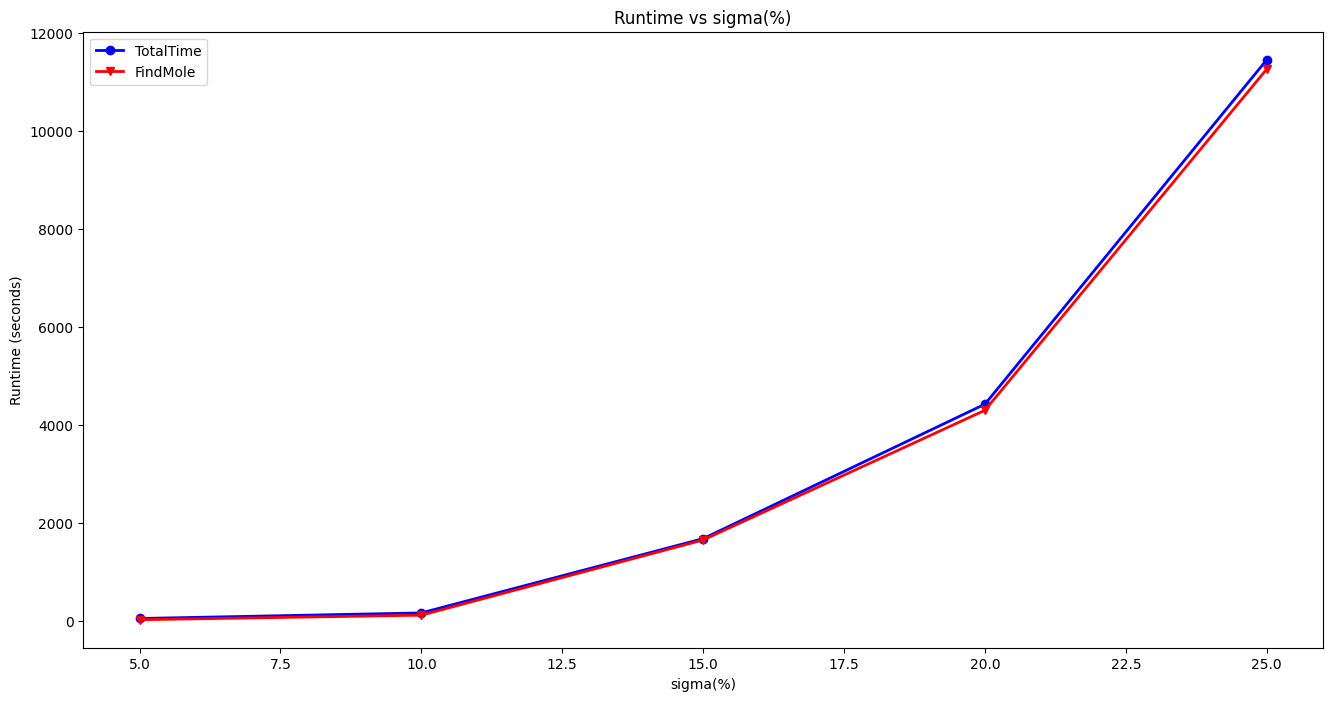

In [37]:
# plot for sigma vs runtime
x = [i*100 for i in sigma_runtime.keys()]
y_total = list(map(lambda a: sigma_runtime.get(a)['total'], sigma_runtime))
y_min_moles = list(map(lambda a: sigma_runtime.get(a)['min_moles'], sigma_runtime))
print(list(y_total))
print(list(y_min_moles))
print(x)

x_label = 'sigma(%)'
y_ticks = [i for i in range(0,30,5)]
print(y_ticks)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x,y_total, label='TotalTime', marker='o', linewidth=2, color='blue')
ax.plot(x,y_min_moles, label='FindMole', marker='v', linewidth=2, color='red')
ax.set_title(f'Runtime vs {x_label}')
ax.set_xlabel(x_label)
ax.set_ylabel('Runtime (seconds)')
ax.legend()